# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [45]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\MsMon\\Desktop\\Proyectos\\IA\\Desastres\\proyectovideo\\resultados\\resul')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\MsMon\Desktop\Proyectos\IA\Desastres\proyectovideo\resultados\resul\
C:\Users\MsMon\Desktop\Proyectos\IA\Desastres\proyectovideo\resultados\resul\incendio 1
C:\Users\MsMon\Desktop\Proyectos\IA\Desastres\proyectovideo\resultados\resul\inundacion 14648
C:\Users\MsMon\Desktop\Proyectos\IA\Desastres\proyectovideo\resultados\resul\robo 9945
C:\Users\MsMon\Desktop\Proyectos\IA\Desastres\proyectovideo\resultados\resul\robocasa 9217
C:\Users\MsMon\Desktop\Proyectos\IA\Desastres\proyectovideo\resultados\resul\tornado 2244
Directorios leidos: 5
Imagenes en cada directorio [14649, 9945, 9217, 2244, 16493]
suma Total de imagenes en subdirs: 52548


/home/likcos/DataSets/sportimages/sportimages/f1 7752


/home/likcos/DataSets/sportimages/sportimages/ciclismo 5053


/home/likcos/DataSets/sportimages/sportimages/golf 7533
/home/likcos/DataSets/sportimages/sportimages/boxeo 9768
/home/likcos/DataSets/sportimages/sportimages/tenis 7125
/home/likcos/DataSets/sportimages/sportimages/basket 8937
Directorios leidos: 10
Imagenes en cada directorio [9349, 5172, 7617, 7752, 5053, 7533, 9768, 7125, 8937, 8822]
suma Total de imagenes en subdirs: 77128


# Creamos las etiquetas

In [46]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  52548


In [47]:
Incidentes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    Incidentes.append(name[len(name)-1])
    indice=indice+1

for i, img in enumerate(images):
    print(f"Image {i} shape: {np.array(img).shape}")

0 incendio
1 inundacion
2 robo
3 robocasa
4 tornado
Image 0 shape: (30, 30, 3)
Image 1 shape: (30, 30, 3)
Image 2 shape: (30, 30, 3)
Image 3 shape: (30, 30, 3)
Image 4 shape: (30, 30, 3)
Image 5 shape: (30, 30, 3)
Image 6 shape: (30, 30, 3)
Image 7 shape: (30, 30, 3)
Image 8 shape: (30, 30, 3)
Image 9 shape: (30, 30, 3)
Image 10 shape: (30, 30, 3)
Image 11 shape: (30, 30, 3)
Image 12 shape: (30, 30, 3)
Image 13 shape: (30, 30, 3)
Image 14 shape: (30, 30, 3)
Image 15 shape: (30, 30, 3)
Image 16 shape: (30, 30, 3)
Image 17 shape: (30, 30, 3)
Image 18 shape: (30, 30, 3)
Image 19 shape: (30, 30, 3)
Image 20 shape: (30, 30, 3)
Image 21 shape: (30, 30, 3)
Image 22 shape: (30, 30, 3)
Image 23 shape: (30, 30, 3)
Image 24 shape: (30, 30, 3)
Image 25 shape: (30, 30, 3)
Image 26 shape: (30, 30, 3)
Image 27 shape: (30, 30, 3)
Image 28 shape: (30, 30, 3)
Image 29 shape: (30, 30, 3)
Image 30 shape: (30, 30, 3)
Image 31 shape: (30, 30, 3)
Image 32 shape: (30, 30, 3)
Image 33 shape: (30, 30, 3)
Image 

In [48]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [49]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (42038, 30, 30, 3) (42038,)
Testing data shape :  (10510, 30, 30, 3) (10510,)


Text(0.5, 1.0, 'Ground Truth : 3')

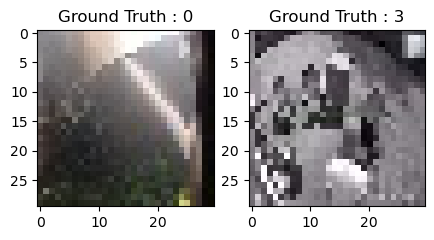

In [50]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

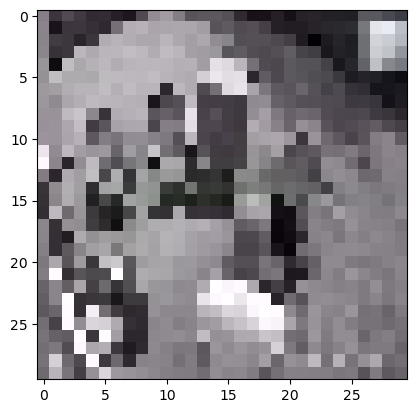

In [51]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [52]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print(len(train_X))
print(len(train_Y_one_hot))


Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]
42038
42038


# Creamos el Set de Entrenamiento y Validación

In [53]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [54]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(33630, 30, 30, 3) (8408, 30, 30, 3) (33630, 5) (8408, 5)


# Creamos el modelo de CNN

In [55]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [56]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(30,30,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))



C:\Users\MsMon\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\MsMon\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [57]:
sport_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         230,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,493 (904.27 KB)

 Trainable params: 231,493 (904.27 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])




C:\Users\MsMon\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: Aprende a clasificar imágenes

In [59]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.2993 - loss: 1.5430 - val_accuracy: 0.6997 - val_loss: 1.2825
Epoch 2/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.4787 - loss: 1.3137 - val_accuracy: 0.7864 - val_loss: 1.0484
Epoch 3/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5709 - loss: 1.1269 - val_accuracy: 0.8017 - val_loss: 0.8792
Epoch 4/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6342 - loss: 0.9917 - val_accuracy: 0.8076 - val_loss: 0.7681
Epoch 5/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6734 - loss: 0.8984 - val_accuracy: 0.8206 - val_loss: 0.6743
Epoch 6/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7019 - loss: 0.8252 - val_accuracy: 0.8699 - val_loss: 0.5988
Epoch 7/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7357 - loss: 0.7571 - val_accuracy: 0.8781 - val_loss: 0.5347
Epoch 8/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7593 - loss: 0.7088 - val_acc

In [61]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("C:\\Users\\MsMon\\Desktop\\Proyectos\\IA\\Desastres\\proyectovideo\\red\\red.h5")
sport_model.save("C:\\Users\\MsMon\\Desktop\\Proyectos\\IA\\Desastres\\proyectovideo\\red\\red.keras")



# Evaluamos la red

In [62]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9572 - loss: 0.2017


In [63]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.20123420655727386
Test accuracy: 0.9554709792137146


In [64]:
sport_train.history

{'accuracy': [0.3581920862197876,
  0.5086827278137207,
  0.5882248282432556,
  0.6435325741767883,
  0.6827535033226013,
  0.7117751836776733,
  0.7447219491004944,
  0.7644068002700806,
  0.7814748883247375,
  0.7988700270652771,
  0.8088313937187195,
  0.8248884677886963,
  0.8333927989006042,
  0.8396372199058533,
  0.852334201335907,
  0.8581920862197876,
  0.8650609850883484,
  0.8742194175720215,
  0.8787986636161804,
  0.8850728273391724],
 'loss': [1.4761921167373657,
  1.2586238384246826,
  1.0911531448364258,
  0.9727036356925964,
  0.8783888220787048,
  0.811608612537384,
  0.7427449822425842,
  0.6955856084823608,
  0.651292622089386,
  0.6065851449966431,
  0.5744314789772034,
  0.5350407361984253,
  0.5111851692199707,
  0.4839858412742615,
  0.45696166157722473,
  0.4345273971557617,
  0.41109782457351685,
  0.3943822979927063,
  0.37921568751335144,
  0.36151909828186035],
 'val_accuracy': [0.6996907591819763,
  0.7863938808441162,
  0.8017364144325256,
  0.80756419897

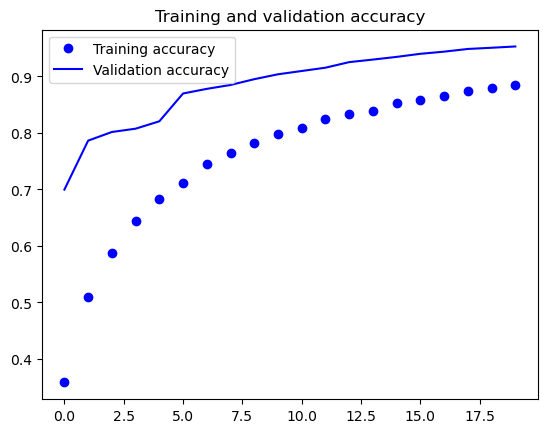

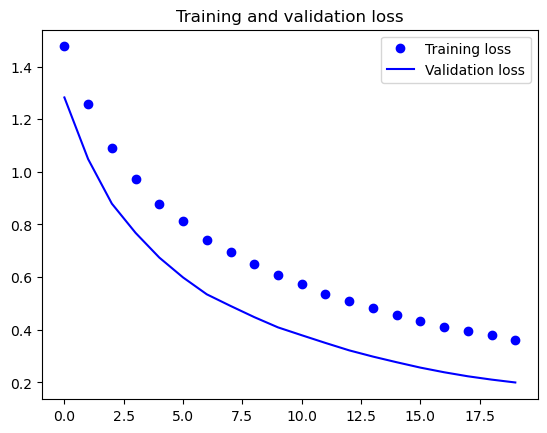

In [65]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [66]:
predicted_classes2 = sport_model.predict(test_X)

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [67]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [68]:
predicted_classes.shape, test_Y.shape

((10510,), (10510,))

# Aprendamos de los errores: Qué mejorar

Found 10042 correct labels


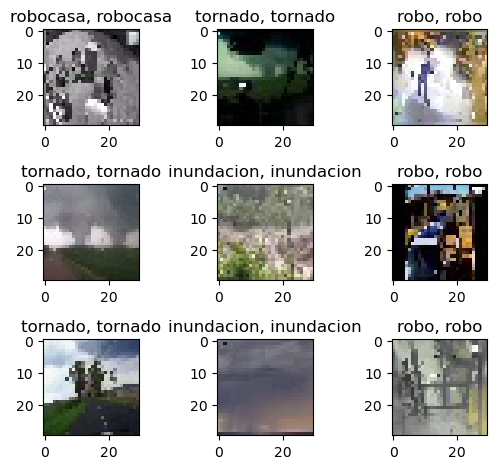

In [69]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[correct]],
                                                    Incidentes[test_Y[correct]]))

    plt.tight_layout()

Found 468 incorrect labels


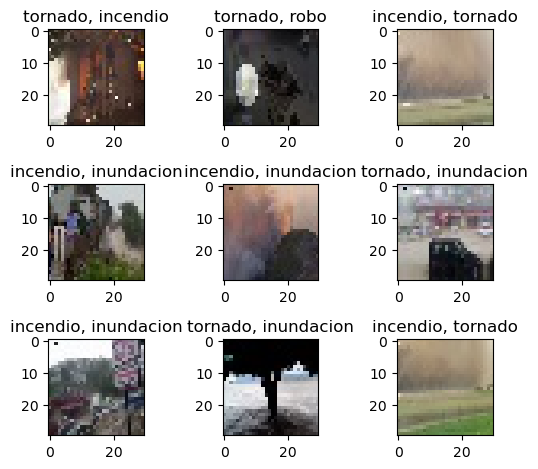

In [70]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[incorrect]],
                                                    Incidentes[test_Y[incorrect]]))
    plt.tight_layout()

In [71]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.98      0.95      2902
     Class 1       0.94      0.91      0.93      1984
     Class 2       0.96      0.99      0.98      1834
     Class 3       1.00      0.85      0.92       486
     Class 4       0.97      0.96      0.97      3304

    accuracy                           0.96     10510
   macro avg       0.96      0.94      0.95     10510
weighted avg       0.96      0.96      0.96     10510

